In [0]:
#ライブラリの読み込み
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
#グラフの設定
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,10)

In [0]:
#ファイルの読み込み
train_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/test.csv'
train_csv = pd.read_csv(train_url, low_memory=False)
test_csv = pd.read_csv(test_url, low_memory=False)

In [0]:
#説明変数の読み込み
X_trainvalid = train_csv.drop(["price", "id"], axis=1)
X_test = test_csv.drop(["id"], axis=1)

#train dataとtest dataの結合（データの取り扱いを簡単にしています）
X_traintest_temp = pd.concat([X_trainvalid, X_test], axis=0)

In [0]:
#説明変数の選択
#X_traintest = X_traintest_temp[['sqft_basement','condition']] #ここに価格に影響を与えると分析した要素（カラム）を入力してください（5つまで）
X_traintest = X_traintest_temp
#デフォルトではsqft_basementとconditionを用いて予測を行なっている

#train dataとtest dataの分割
X_train = X_traintest.iloc[:train_csv.shape[0], :]
X_test = X_traintest.iloc[train_csv.shape[0]:, :]

#目的変数の読み込み（log変換を行なっています）
y_train = np.log(train_csv["price"].values)

#線形回帰モデルの構築とモデルによる予測
model = LinearRegression().fit(X_train, y_train)
test_pred = np.exp(model.predict(X_test))

In [165]:
#提出ファイルの出力
sub_df = pd.DataFrame({"id":test_csv["id"].values,"price":test_pred})
sub_df.to_csv("./output/submission.csv", index=False)

FileNotFoundError: ignored

RMSLE: 207388.457299


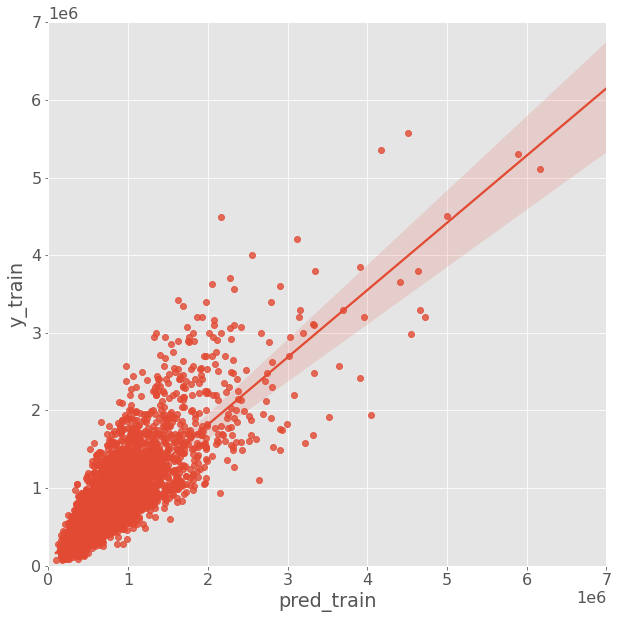

In [169]:
#物件価格の予測と正解データの散布図
train_pred = np.exp(model.predict(X_train))
data = pd.DataFrame({"pred_train": train_pred,"y_train": np.exp(y_train)})
sns.regplot(x="pred_train", y="y_train", data=data)
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)

#RMSLEを表示します
print("RMSLE: %f" % np.sqrt(mean_squared_error(train_pred, np.exp(y_train))))

In [170]:
model.intercept_

-5.511474969669035

In [171]:
model.coef_

array([-1.30782946e-02,  7.10649950e-02,  9.60017692e-05,  4.90364092e-07,
        6.88666341e-02,  3.72762813e-01,  6.12015924e-02,  5.70222145e-02,
        1.59909993e-01,  4.32123058e-05,  5.27894633e-05, -3.53569264e-03,
        3.17279663e-05, -6.20098458e-04,  1.39127387e+00, -1.47706982e-01,
        9.29026392e-05, -2.49069964e-07])

In [177]:
coef_df = pd.DataFrame(X_train.columns, columns=['Feature'])
coef_df['coefficient'] = pd.Series(model.coef_)
coef_df

,Feature,coefficient
0,bedrooms,-1.307829e-02
1,bathrooms,7.106500e-02
2,sqft_living,9.600177e-05
3,sqft_lot,4.903641e-07
4,floors,6.886663e-02
5,waterfront,3.727628e-01
6,view,6.120159e-02
7,condition,5.702221e-02
8,grade,1.599100e-01
9,sqft_above,4.321231e-05
